In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest,f_classif,chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fuel-consumption-dataset/Fuel-consumption.csv


In [3]:
df=pd.read_csv('/kaggle/input/fuel-consumption-dataset/Fuel-consumption.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
df.shape

(1067, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

# **Encocding the dataset with label encoder**

In [8]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [9]:
from pandas.core.dtypes.common import is_numeric_dtype

In [10]:
#from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

In [11]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,2014,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,2014,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,2014,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,2014,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,38,624,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1063,2014,38,624,11,3.2,6,11,2,13.2,9.5,11.5,25,264
1064,2014,38,625,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1065,2014,38,625,11,3.2,6,11,2,12.9,9.3,11.3,25,260


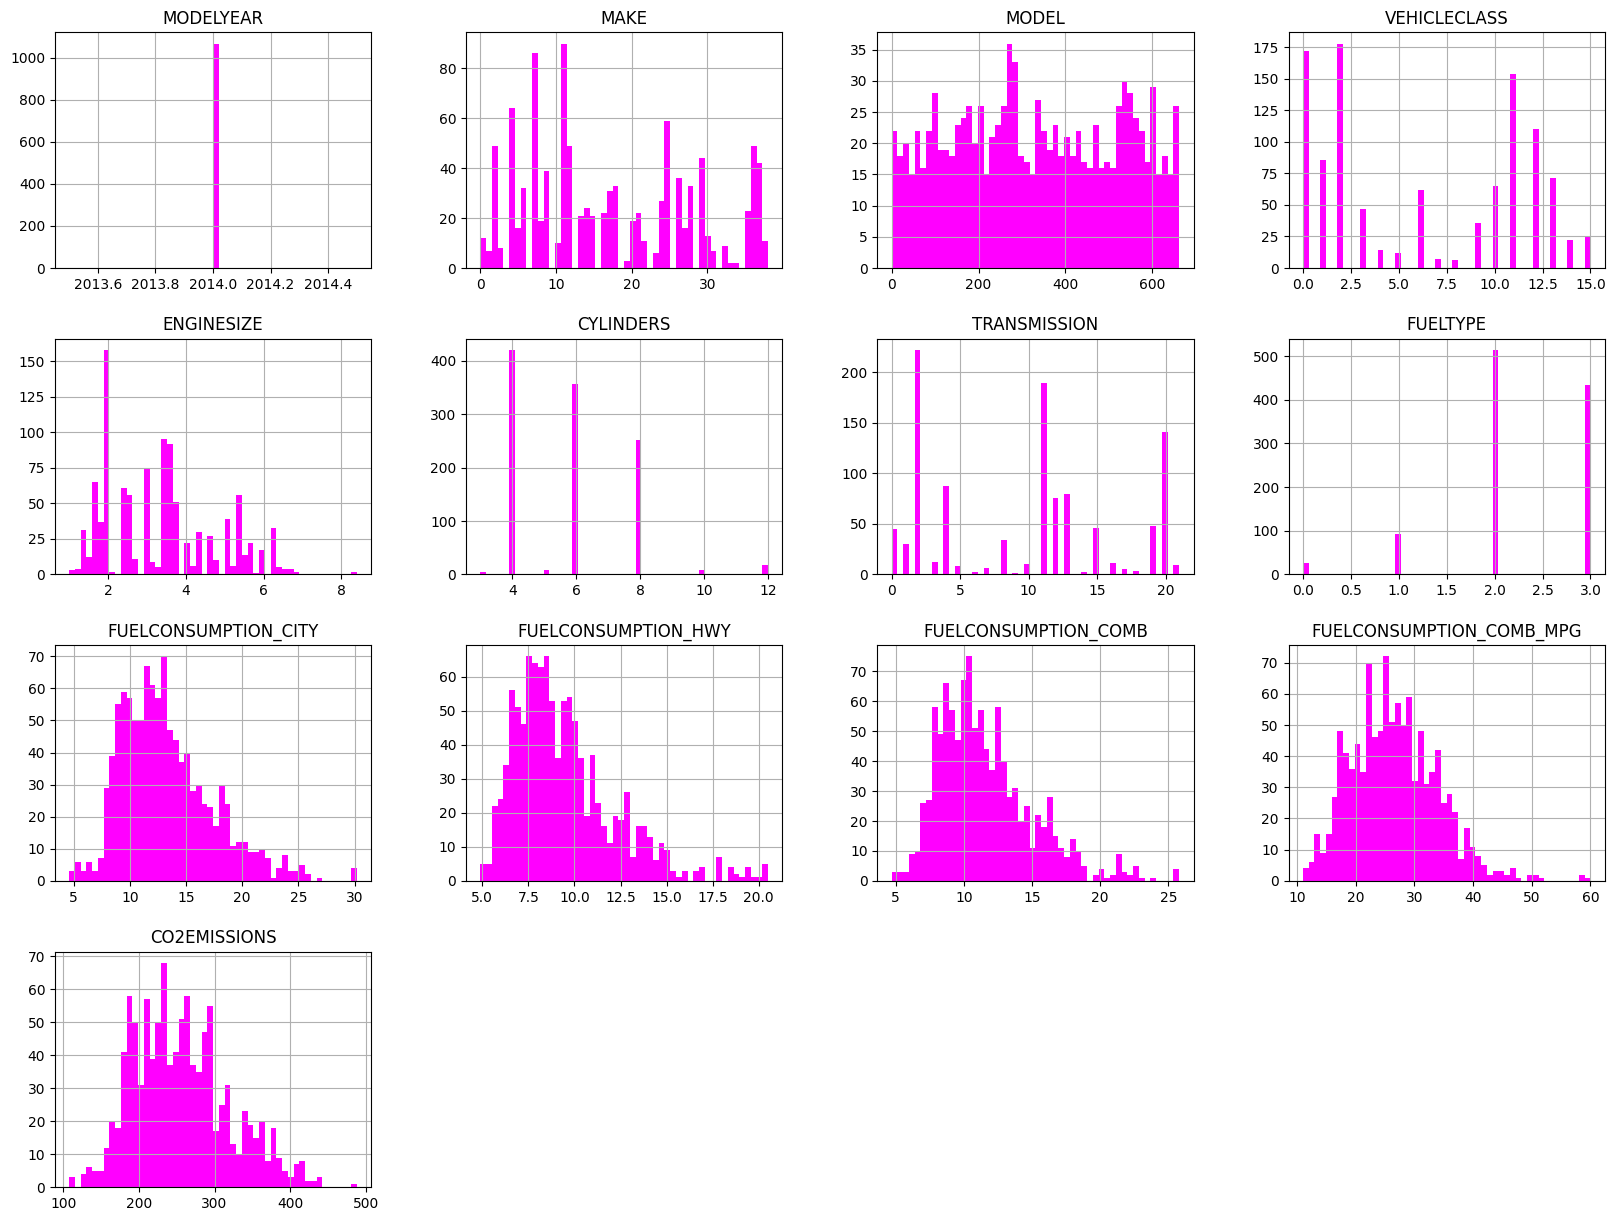

In [12]:
df.hist(bins=50, figsize=(20,15), color='magenta')
plt.show()

# **Feature Comparison Based on Correlation**

<Axes: >

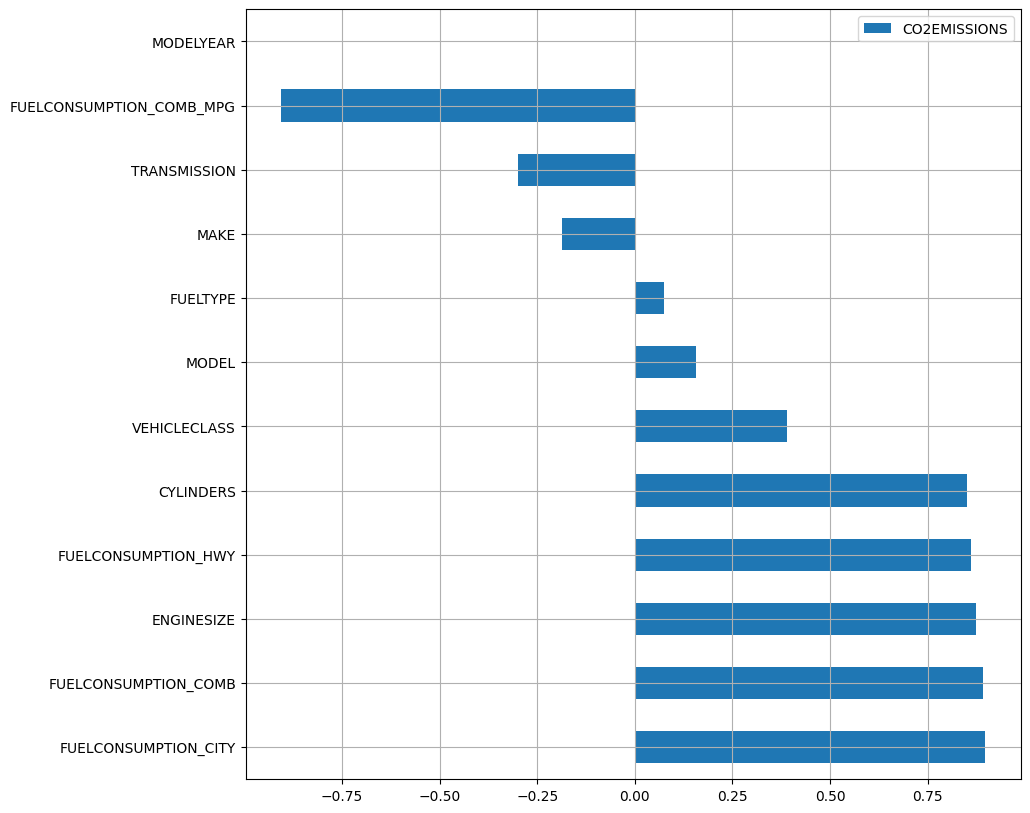

In [13]:
corr = pd.DataFrame(df.corr()['CO2EMISSIONS']).drop('CO2EMISSIONS',axis=0).sort_values(by = 'CO2EMISSIONS',ascending=False)
corr.plot(kind='barh',grid=True,figsize=(10,10))

In [14]:
df.drop('MODELYEAR',axis=1,inplace=True)
df1=df.copy()
df

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,38,624,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1063,38,624,11,3.2,6,11,2,13.2,9.5,11.5,25,264
1064,38,625,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1065,38,625,11,3.2,6,11,2,12.9,9.3,11.3,25,260


# **Heatmap of Correlation Between each feature**

<Axes: >

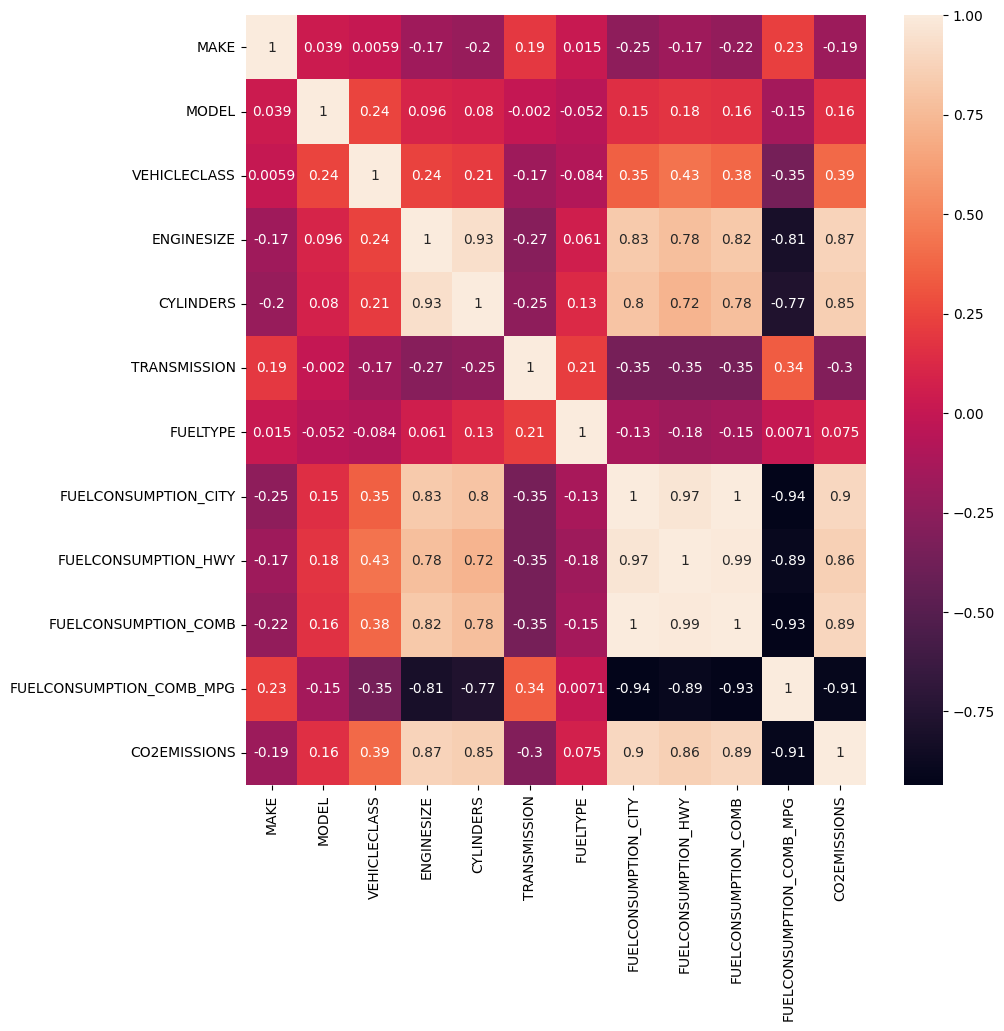

In [15]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot=True)

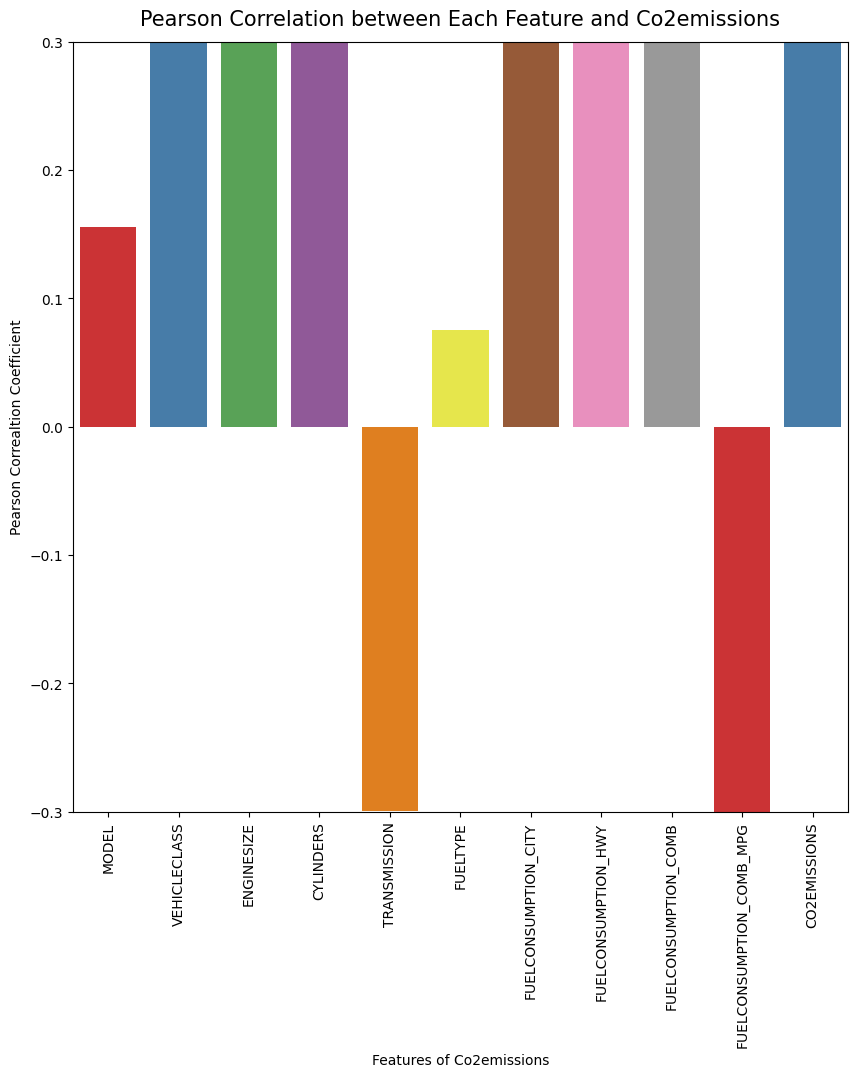

In [16]:
corr_ft_hd_x = list(df.corr().columns)
del corr_ft_hd_x[0]
corr_ft_hd_y = list(df.corr()["CO2EMISSIONS"])
del corr_ft_hd_y[0]

corr_ft_hd = plt.figure(figsize= (10, 10))
corr_ft_hd = sns.barplot(x= corr_ft_hd_x, y= corr_ft_hd_y, palette= "Set1")
corr_ft_hd.set_title("Pearson Correlation between Each Feature and Co2emissions",
                     fontsize= 15, pad= 12)
corr_ft_hd.set(xlabel= "Features of Co2emissions",
               ylabel= "Pearson Correaltion Coefficient",
               ylim= (-0.3, 0.3))
corr_ft_hd.set_xticklabels(corr_ft_hd_x, rotation= "vertical")
plt.savefig('COR.png')

plt.show()

# **Individually correlation of Co2_Emission with each feature**

In [17]:
for param in ['MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']:
    print(f"Correlation of CO2EMISSIONS and {param} is \n ", df[[param,"CO2EMISSIONS"]].corr())
    print("\n")

Correlation of CO2EMISSIONS and MAKE is 
                    MAKE  CO2EMISSIONS
MAKE          1.000000     -0.186504
CO2EMISSIONS -0.186504      1.000000


Correlation of CO2EMISSIONS and MODEL is 
                   MODEL  CO2EMISSIONS
MODEL         1.000000      0.155492
CO2EMISSIONS  0.155492      1.000000


Correlation of CO2EMISSIONS and VEHICLECLASS is 
                VEHICLECLASS  CO2EMISSIONS
VEHICLECLASS      1.000000      0.388468
CO2EMISSIONS      0.388468      1.000000


Correlation of CO2EMISSIONS and ENGINESIZE is 
                ENGINESIZE  CO2EMISSIONS
ENGINESIZE      1.000000      0.874154
CO2EMISSIONS    0.874154      1.000000


Correlation of CO2EMISSIONS and CYLINDERS is 
                CYLINDERS  CO2EMISSIONS
CYLINDERS      1.000000      0.849685
CO2EMISSIONS   0.849685      1.000000


Correlation of CO2EMISSIONS and TRANSMISSION is 
                TRANSMISSION  CO2EMISSIONS
TRANSMISSION      1.000000     -0.299393
CO2EMISSIONS     -0.299393      1.000000


Cor

# **Pearson Correlation Coefficient and P-value for each feature with Co2_Emission**

In [18]:
from scipy import stats

In [19]:
for param in [ 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['CO2EMISSIONS'])
    print(param)
    print("\n")
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
    print("\n")

MAKE


The Pearson Correlation Coefficient for  MAKE  is -0.18650406720640658  with a P-value of P = 8.30696355520739e-10


MODEL


The Pearson Correlation Coefficient for  MODEL  is 0.1554924709461979  with a P-value of P = 3.3205923479542656e-07


VEHICLECLASS


The Pearson Correlation Coefficient for  VEHICLECLASS  is 0.3884676291744814  with a P-value of P = 9.229899689340892e-40


ENGINESIZE


The Pearson Correlation Coefficient for  ENGINESIZE  is 0.8741543683958126  with a P-value of P = 0.0


CYLINDERS


The Pearson Correlation Coefficient for  CYLINDERS  is 0.8496845920141145  with a P-value of P = 2.770937203987512e-298


TRANSMISSION


The Pearson Correlation Coefficient for  TRANSMISSION  is -0.2993932935867686  with a P-value of P = 1.5481800462222164e-23


FUELTYPE


The Pearson Correlation Coefficient for  FUELTYPE  is 0.07516701048709117  with a P-value of P = 0.014052252196548785


FUELCONSUMPTION_CITY


The Pearson Correlation Coefficient for  FUELCONSUMPTION_CITY  is

# **Separating x and y**

In [20]:
x=df.drop('CO2EMISSIONS',axis=1)
y=df['CO2EMISSIONS']

In [21]:
x.shape

(1067, 11)

In [22]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

# **Feature importance of feature selection using Random Forest Classifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=340)
rf.fit(x,y)

RandomForestClassifier(n_estimators=340)

In [24]:
importances=rf.feature_importances_
importances

array([0.05539169, 0.07871274, 0.04344972, 0.05684868, 0.01542453,
       0.05023127, 0.0258512 , 0.12867818, 0.10577378, 0.29827714,
       0.14136107])

In [27]:
imp=pd.DataFrame(importances,columns=['Gain_Score'])
imp.head()


,Gain_Score
0,0.055392
1,0.078713
2,0.043450
3,0.056849
4,0.015425


In [28]:
x.columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG'],
      dtype='object')

In [29]:
cols=pd.DataFrame(x.columns,columns=['Feature_Names'])
cols

,Feature_Names
0,MAKE
1,MODEL
2,VEHICLECLASS
3,ENGINESIZE
4,CYLINDERS
5,TRANSMISSION
6,FUELTYPE
7,FUELCONSUMPTION_CITY
8,FUELCONSUMPTION_HWY
9,FUELCONSUMPTION_COMB


# **Column Concatenation**

In [30]:
gains=pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Score
0,MAKE,0.055392
1,MODEL,0.078713
2,VEHICLECLASS,0.043450
3,ENGINESIZE,0.056849
4,CYLINDERS,0.015425
5,TRANSMISSION,0.050231
6,FUELTYPE,0.025851
7,FUELCONSUMPTION_CITY,0.128678
8,FUELCONSUMPTION_HWY,0.105774
9,FUELCONSUMPTION_COMB,0.298277


In [31]:
newx=gains.nlargest(16,'Gain_Score') #to see largest feature
newx

,Feature_Names,Gain_Score
9,FUELCONSUMPTION_COMB,0.298277
10,FUELCONSUMPTION_COMB_MPG,0.141361
7,FUELCONSUMPTION_CITY,0.128678
8,FUELCONSUMPTION_HWY,0.105774
1,MODEL,0.078713
3,ENGINESIZE,0.056849
0,MAKE,0.055392
5,TRANSMISSION,0.050231
2,VEHICLECLASS,0.043450
6,FUELTYPE,0.025851


<Axes: >

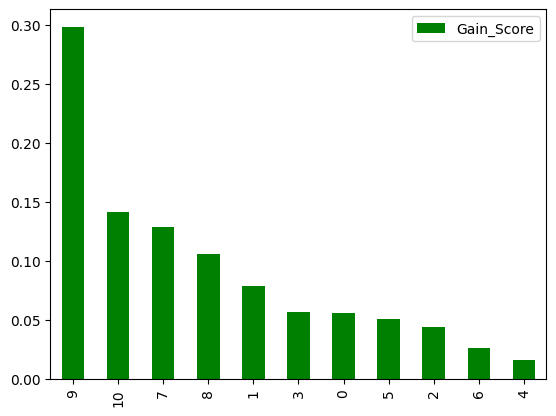

In [32]:
newx.plot(kind='bar',color='green')

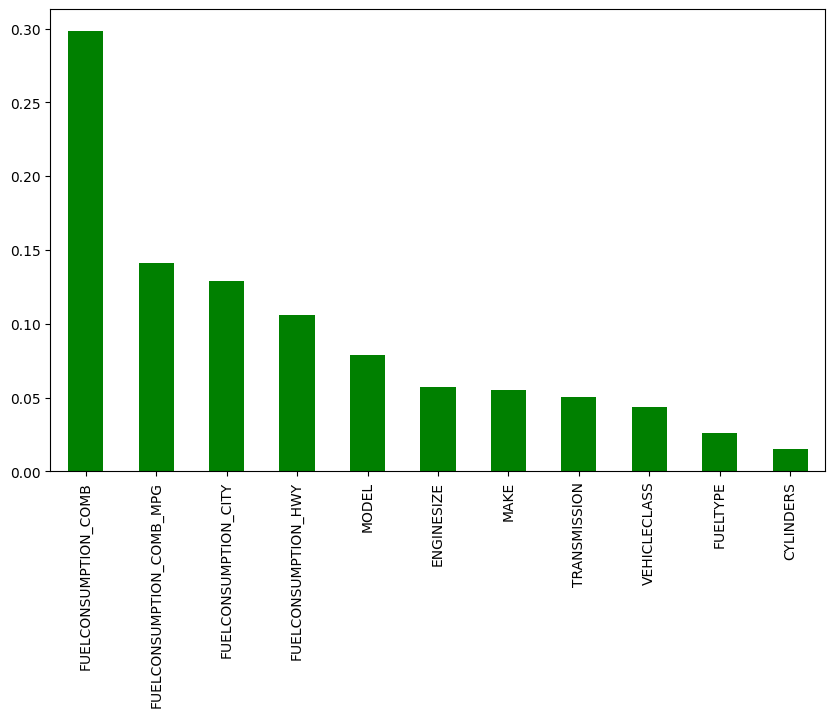

In [33]:
features=pd.Series(rf.feature_importances_,index=x.columns)
plt.figure(figsize=(10,6))
features.nlargest(16).plot(kind='bar',color='green')
plt.savefig('ETC.jpg')

# **feature Importance of Feature Selection Using Fisher score**

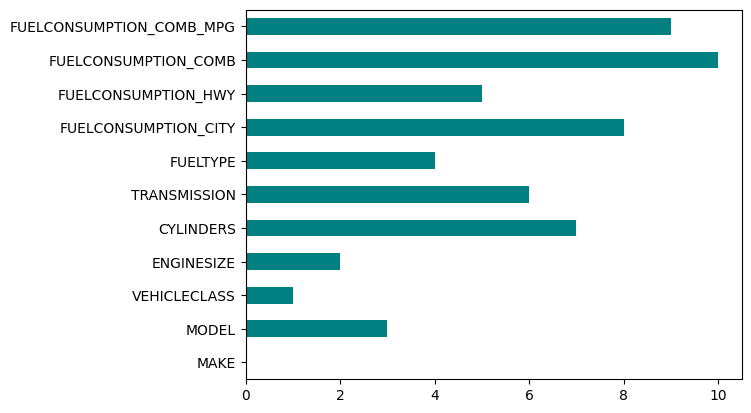

In [37]:
from skfeature.function.similarity_based import fisher_score
ranks = fisher_score.fisher_score(x.to_numpy(),
                      y.to_numpy())
feat_importances = pd.Series(ranks,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

# **Forward Feature Selection**

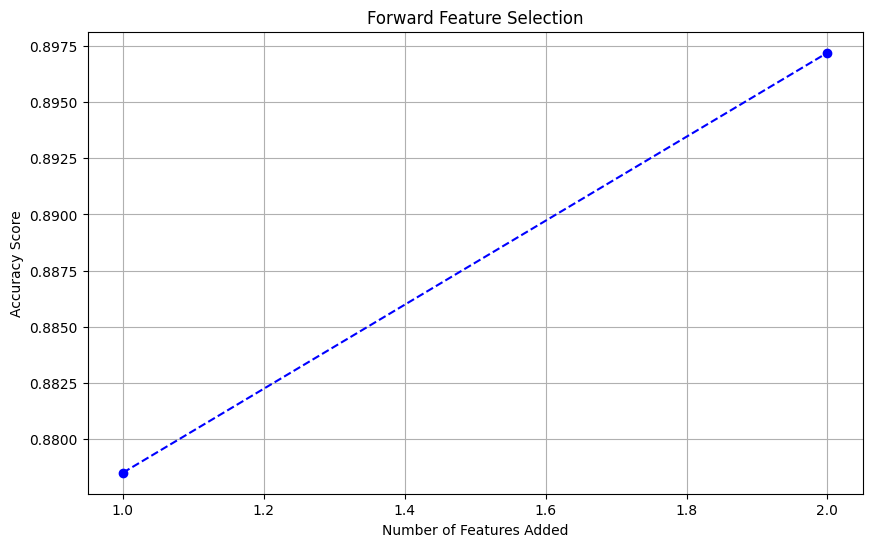

Selected Features: ['FUELCONSUMPTION_COMB', 'FUELTYPE']


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your dataset and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Function to perform forward feature selection with figure
def forward_feature_selection_with_figure(X_train, X_test, y_train, y_test, model):
    selected_features = []
    best_score = 0
    scores_history = []

    while True:
        remaining_features = [feature for feature in X_train.columns if feature not in selected_features]
        if not remaining_features:
            break  # No more features to add

        scores = []

        for feature in remaining_features:
            features_to_try = selected_features + [feature]
            X_train_subset = X_train[features_to_try]
            X_test_subset = X_test[features_to_try]

            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_test_subset)
            score = accuracy_score(y_test, y_pred)
            scores.append((feature, score))

        # Select the feature that provides the best improvement in score
        best_feature, best_score_for_feature = max(scores, key=lambda x: x[1])

        if best_score_for_feature > best_score:
            selected_features.append(best_feature)
            best_score = best_score_for_feature
            scores_history.append(best_score)
        else:
            break  # Stop if adding a feature doesn't improve the score

    # Plot the scores during each step
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores_history) + 1), scores_history, marker='o', linestyle='--', color='b')
    plt.title('Forward Feature Selection')
    plt.xlabel('Number of Features Added')
    plt.ylabel('Accuracy Score')
    plt.grid(True)
    plt.show()

    return selected_features

# Example usage with a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
selected_features = forward_feature_selection_with_figure(X_train, X_test, y_train, y_test, model)

print("Selected Features:", selected_features)


# **Backward Feature Ellimination**

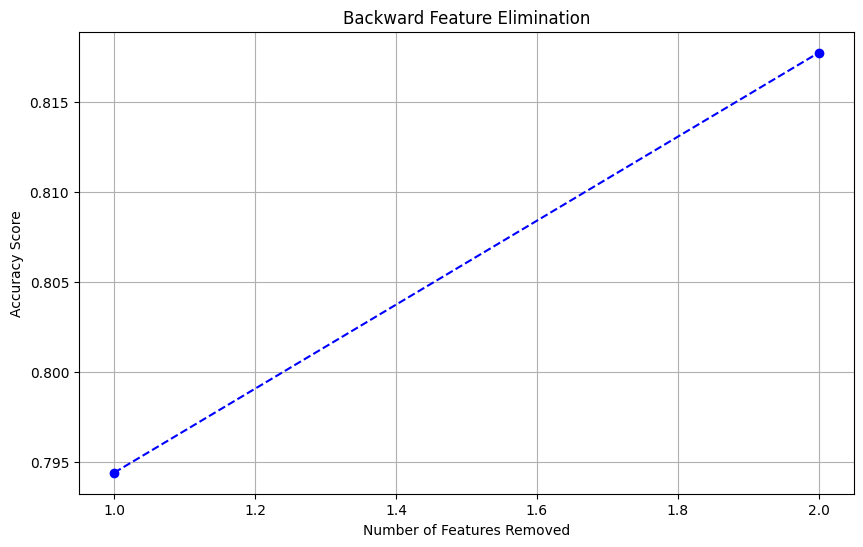

Remaining Features: ['MAKE', 'MODEL', 'VEHICLECLASS', 'CYLINDERS', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your dataset and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Function to perform backward feature elimination with figure
def backward_feature_elimination_with_figure(X_train, X_test, y_train, y_test, model):
    remaining_features = list(X_train.columns)
    best_score = 0
    scores_history = []

    while True:
        scores = []

        for feature in remaining_features:
            features_to_try = [f for f in remaining_features if f != feature]
            X_train_subset = X_train[features_to_try]
            X_test_subset = X_test[features_to_try]

            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_test_subset)
            score = accuracy_score(y_test, y_pred)
            scores.append((feature, score))

        # Select the feature to remove that provides the best improvement in score
        worst_feature, worst_score_for_feature = max(scores, key=lambda x: x[1])

        if worst_score_for_feature > best_score:
            remaining_features.remove(worst_feature)
            best_score = worst_score_for_feature
            scores_history.append(best_score)
        else:
            break  # Stop if removing a feature doesn't improve the score

    # Plot the scores during each step
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores_history) + 1), scores_history, marker='o', linestyle='--', color='b')
    plt.title('Backward Feature Elimination')
    plt.xlabel('Number of Features Removed')
    plt.ylabel('Accuracy Score')
    plt.grid(True)
    plt.show()

    return remaining_features

# Example usage with a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
remaining_features = backward_feature_elimination_with_figure(X_train, X_test, y_train, y_test, model)

print("Remaining Features:", remaining_features)


# **Feature importance of feature selection using variance threshold**

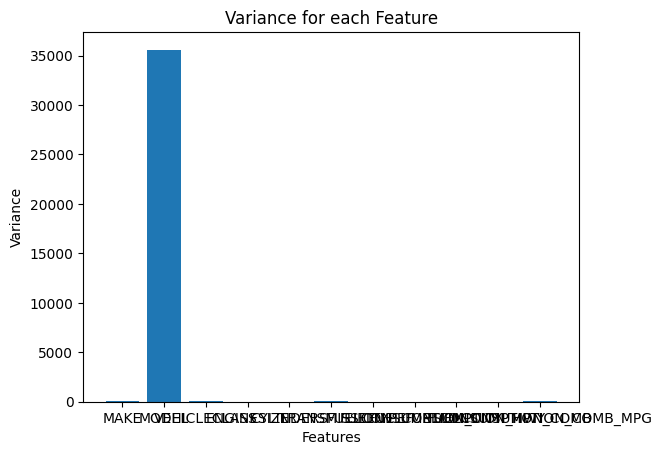

Selected Features: Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG'],
      dtype='object')


In [40]:

from sklearn.feature_selection import VarianceThreshold


# Generate some sample data
np.random.seed(0)


variances = x.var()

# Create a bar plot to visualize variances
plt.bar(range(len(variances)), variances, tick_label=x.columns)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance for each Feature')
plt.show()

# Set a variance threshold (you can adjust this threshold)
threshold = 0.1

# Use VarianceThreshold to select features
selector = VarianceThreshold(threshold)
selected_features = x.columns[selector.fit(x).get_support()]

# Print selected features
print("Selected Features:", selected_features)


# **With Mean Absolute Difference (MAD)**

<BarContainer object of 11 artists>

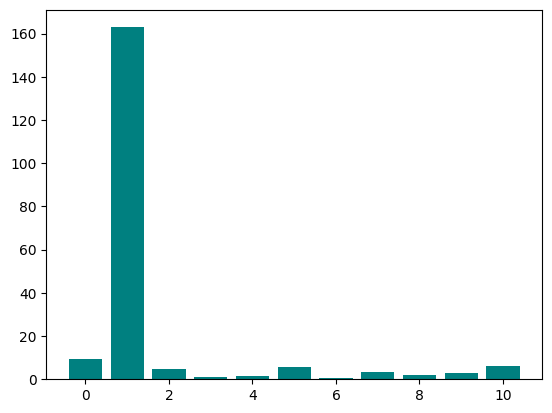

In [41]:
mean_abs_diff = np.sum(np.abs(x-np.mean(x,axis=0)),axis=0)/x.shape[0]
plt.bar(np.arange(x.shape[1]),mean_abs_diff,color='teal')

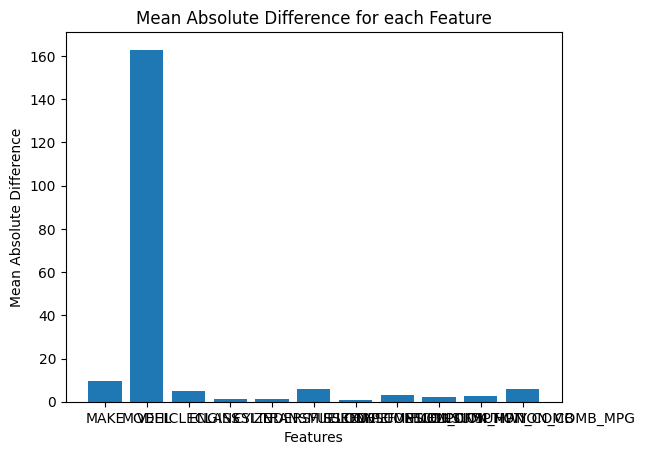

Selected Features: Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG'],
      dtype='object')


In [42]:


mad_values = x.apply(lambda col: np.mean(np.abs(col - col.mean())))

# Create a bar plot to visualize MAD
plt.bar(range(len(mad_values)), mad_values, tick_label=x.columns)
plt.xlabel('Features')
plt.ylabel('Mean Absolute Difference')
plt.title('Mean Absolute Difference for each Feature')
plt.show()

# Set a MAD threshold (you can adjust this threshold)
threshold = 0.1

# Select features based on the threshold
selected_features = x.columns[mad_values > threshold]

# Print selected features
print("Selected Features:", selected_features)


# **With Exhaqustive Feature Selection**

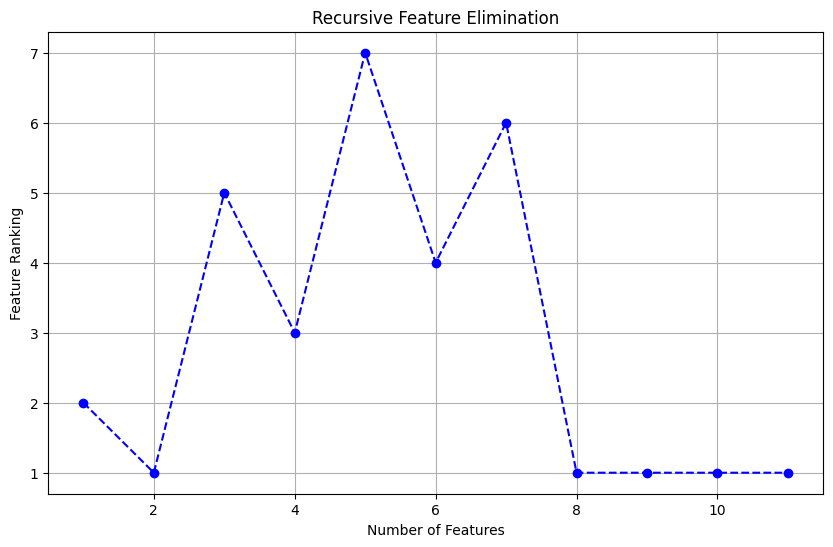

Selected Features: Index(['MODEL', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
       'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG'],
      dtype='object')


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your dataset and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Function for recursive feature elimination with figure
def rfe_with_figure(X_train, X_test, y_train, y_test, model, step=1):
    selector = RFE(estimator=model, step=step)
    selector = selector.fit(X_train, y_train)

    # Plot the number of features vs. performance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(selector.ranking_) + 1), selector.ranking_, marker='o', linestyle='--', color='b')
    plt.title('Recursive Feature Elimination')
    plt.xlabel('Number of Features')
    plt.ylabel('Feature Ranking')
    plt.grid(True)
    plt.show()

    # Get the selected features
    selected_features = X_train.columns[selector.support_]
    
    return selected_features

# Example usage with a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
selected_features = rfe_with_figure(X_train, X_test, y_train, y_test, model)

print("Selected Features:", selected_features)


# **With Lasso Regularization**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.356e+05, tolerance: 3.392e+02
  model = cd_fast.enet_coordinate_descent(


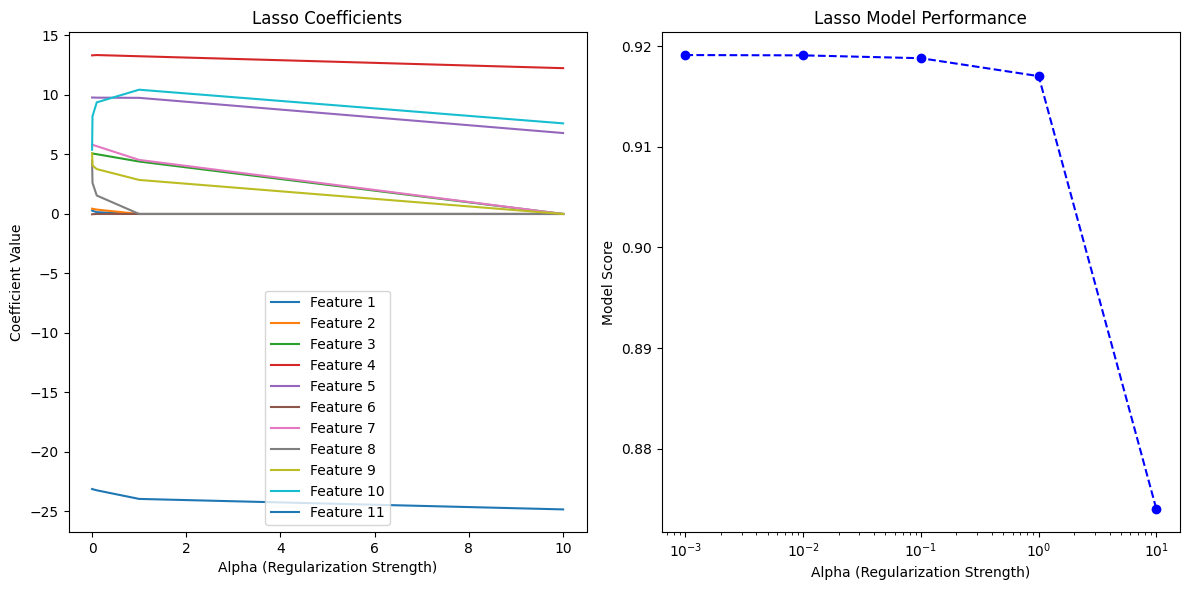

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your dataset and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function for Lasso regularization with figure
def lasso_with_figure(X_train, X_test, y_train, y_test, alpha_values):
    coefficients = []
    scores = []

    for alpha in alpha_values:
        model = Lasso(alpha=alpha)
        model.fit(X_train, y_train)

        # Store the coefficients
        coefficients.append(model.coef_)

        # Evaluate the model
        y_pred = model.predict(X_test)
        score = model.score(X_test, y_test)
        scores.append(score)

    # Plot the coefficients
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for i in range(X_train.shape[1]):
        plt.plot(alpha_values, [coef[i] for coef in coefficients], label=f'Feature {i + 1}')

    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Coefficient Value')
    plt.title('Lasso Coefficients')
    plt.legend()

    # Plot the model performance
    plt.subplot(1, 2, 2)
    plt.plot(alpha_values, scores, marker='o', linestyle='--', color='b')
    plt.xscale('log')  # Log scale for better visualization
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Model Score')
    plt.title('Lasso Model Performance')

    plt.tight_layout()
    plt.show()

# Example usage
alpha_values = [0.001, 0.01, 0.1, 1, 10]
lasso_with_figure(X_train_scaled, X_test_scaled, y_train, y_test, alpha_values)


# **Feature Importrance of Feature Selection using Extra Tree Classifier**

In [45]:
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [46]:
feature_importance=extra.feature_importances_
feature_importance

array([0.05228996, 0.06580268, 0.05274302, 0.06224753, 0.02231636,
       0.05846431, 0.03651305, 0.12459672, 0.10513715, 0.26576913,
       0.15412009])

In [47]:
imp=pd.DataFrame(feature_importance,columns=['Gain_Score'])
imp

,Gain_Score
0,0.052290
1,0.065803
2,0.052743
3,0.062248
4,0.022316
5,0.058464
6,0.036513
7,0.124597
8,0.105137
9,0.265769


In [48]:
cols=pd.DataFrame(x.columns,columns=['Feature_Names'])
cols

,Feature_Names
0,MAKE
1,MODEL
2,VEHICLECLASS
3,ENGINESIZE
4,CYLINDERS
5,TRANSMISSION
6,FUELTYPE
7,FUELCONSUMPTION_CITY
8,FUELCONSUMPTION_HWY
9,FUELCONSUMPTION_COMB


In [49]:
gains=pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Score
0,MAKE,0.052290
1,MODEL,0.065803
2,VEHICLECLASS,0.052743
3,ENGINESIZE,0.062248
4,CYLINDERS,0.022316
5,TRANSMISSION,0.058464
6,FUELTYPE,0.036513
7,FUELCONSUMPTION_CITY,0.124597
8,FUELCONSUMPTION_HWY,0.105137
9,FUELCONSUMPTION_COMB,0.265769


In [50]:
newx=gains.nlargest(16,'Gain_Score') #to see largest feature
newx

,Feature_Names,Gain_Score
9,FUELCONSUMPTION_COMB,0.265769
10,FUELCONSUMPTION_COMB_MPG,0.154120
7,FUELCONSUMPTION_CITY,0.124597
8,FUELCONSUMPTION_HWY,0.105137
1,MODEL,0.065803
3,ENGINESIZE,0.062248
5,TRANSMISSION,0.058464
2,VEHICLECLASS,0.052743
0,MAKE,0.052290
6,FUELTYPE,0.036513


<Axes: >

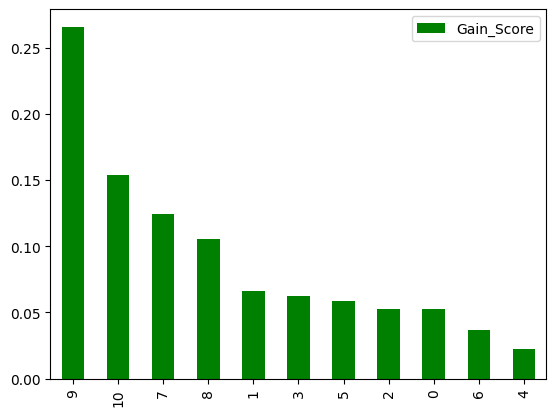

In [51]:
newx.plot(kind='bar',color='green')

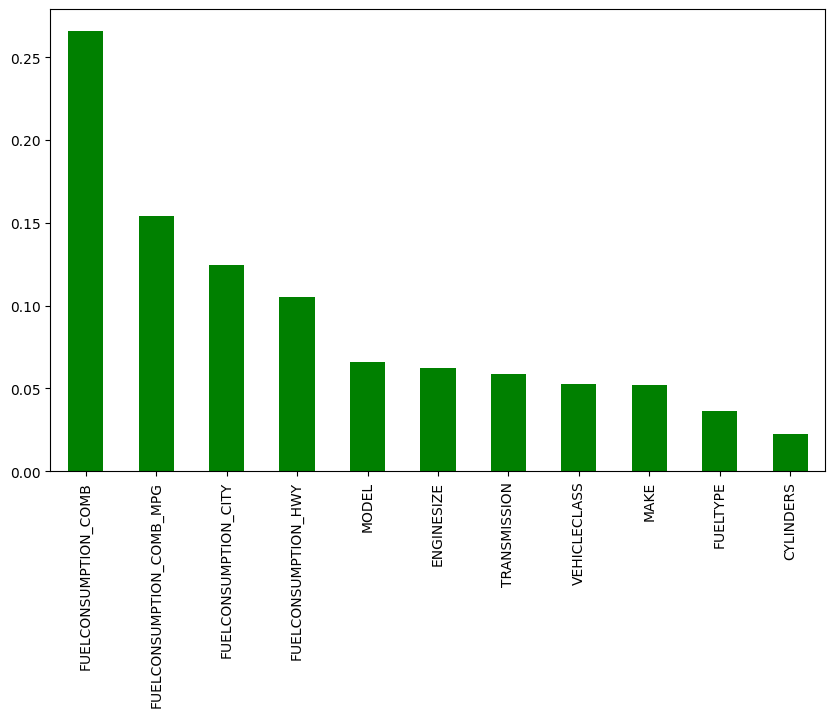

In [52]:
features=pd.Series(extra.feature_importances_,index=x.columns)
plt.figure(figsize=(10,6))
features.nlargest(16).plot(kind='bar',color='green')
plt.savefig('ETC.jpg')

# **Feature importance of feature selection using selectkBest**

In [53]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2
model1=SelectKBest(score_func=f_classif)#Based on ANNOVA

In [54]:
feature_score=model1.fit(x,y)

In [56]:
feature_score.scores_

array([  1.85798111,   1.83546916,   2.77475693,  31.34207382,
        27.47505354,   2.39990525,   4.26061691,  66.6573229 ,
        45.80379862,  64.09744346, 154.86500189])

In [57]:
cols2=pd.DataFrame(feature_score.scores_,columns=['Feature_Score'])
cols2

,Feature_Score
0,1.857981
1,1.835469
2,2.774757
3,31.342074
4,27.475054
5,2.399905
6,4.260617
7,66.657323
8,45.803799
9,64.097443


In [58]:
col2=pd.DataFrame(x.columns,columns=['Features_Names'])
col2

,Features_Names
0,MAKE
1,MODEL
2,VEHICLECLASS
3,ENGINESIZE
4,CYLINDERS
5,TRANSMISSION
6,FUELTYPE
7,FUELCONSUMPTION_CITY
8,FUELCONSUMPTION_HWY
9,FUELCONSUMPTION_COMB


In [59]:
scores=pd.concat([col2,cols2],axis=1)
scores

,Features_Names,Feature_Score
0,MAKE,1.857981
1,MODEL,1.835469
2,VEHICLECLASS,2.774757
3,ENGINESIZE,31.342074
4,CYLINDERS,27.475054
5,TRANSMISSION,2.399905
6,FUELTYPE,4.260617
7,FUELCONSUMPTION_CITY,66.657323
8,FUELCONSUMPTION_HWY,45.803799
9,FUELCONSUMPTION_COMB,64.097443


In [60]:
scores.nlargest(16,'Feature_Score')

,Features_Names,Feature_Score
10,FUELCONSUMPTION_COMB_MPG,154.865002
7,FUELCONSUMPTION_CITY,66.657323
9,FUELCONSUMPTION_COMB,64.097443
8,FUELCONSUMPTION_HWY,45.803799
3,ENGINESIZE,31.342074
4,CYLINDERS,27.475054
6,FUELTYPE,4.260617
2,VEHICLECLASS,2.774757
5,TRANSMISSION,2.399905
0,MAKE,1.857981


<Axes: >

<Figure size 800x800 with 0 Axes>

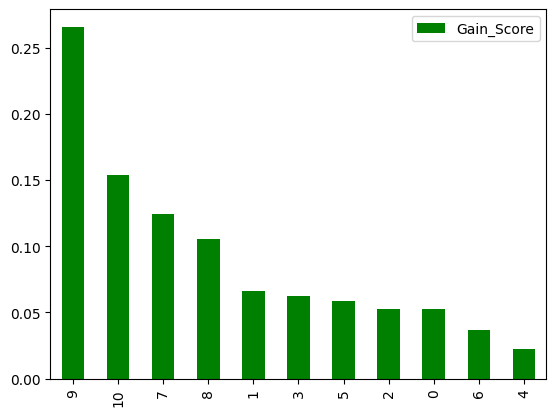

In [61]:
plt.figure(figsize=(8,8))
newx.plot(kind='bar',color='green')


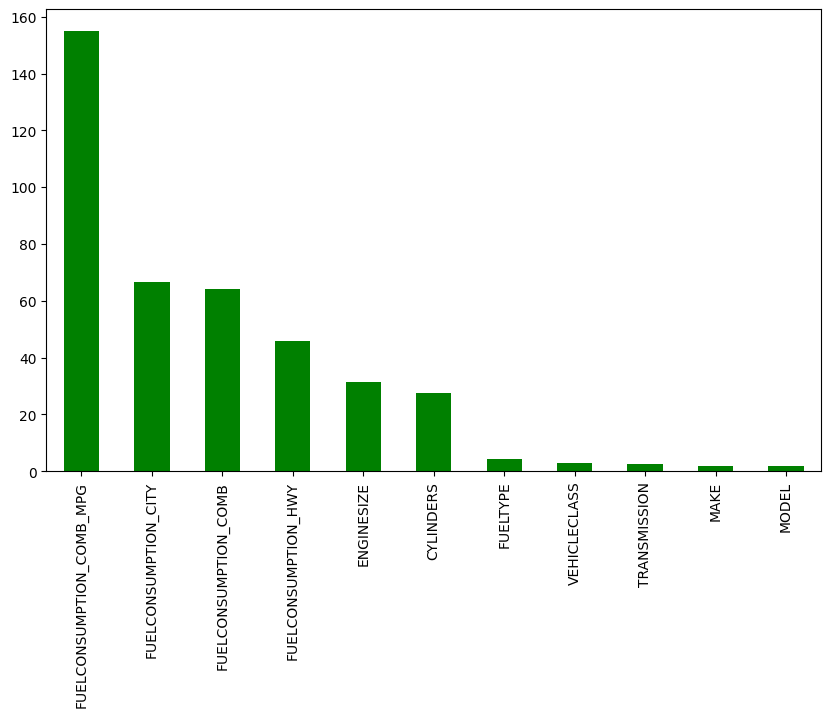

In [62]:
features=pd.Series(feature_score.scores_,index=x.columns)
plt.figure(figsize=(10,6))
features.nlargest(16).plot(kind='bar',color='green')
plt.savefig('Kbest.jpg')

# **Data splitting**
# Separating x and y based on above feature selection technique**

In [63]:
x1=df[['FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY','ENGINESIZE', 'CYLINDERS']]

In [64]:
y1=df['CO2EMISSIONS']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=5)
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [66]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [67]:
predictions=linear_reg.predict(x_test)
predictions

array([306.34731668, 278.28131555, 134.76739902, 291.9813764 ,
       368.72860059, 254.19060138, 310.86140901, 217.46080639,
       180.31500672, 195.89314151, 260.91112986, 346.13550841,
       369.54188505, 210.08158227, 336.86961734, 223.07403144,
       164.30814889, 330.24569763, 213.39941135, 319.84083586,
       241.27953653, 262.92716134, 387.09340098, 257.65684296,
       269.64349701, 374.83245045, 287.00575539, 224.47144858,
       238.02736639, 270.6897551 , 263.26093655, 253.88585995,
       253.3091345 , 193.38068713, 317.35321159, 165.58510553,
       301.98322951, 254.83331083, 316.65038945, 376.41887404,
       369.67384218, 164.94239608, 197.26685605, 198.66541157,
       236.84114721, 362.45017507, 343.02567205, 303.32325414,
       356.63544122, 341.45228294, 193.96754918, 273.33631012,
       269.85368984, 253.11957898, 292.0679977 , 310.40406227,
       207.89831777, 263.26093655, 312.64278165, 162.75113849,
       362.45017507, 258.07511353, 278.6932498 , 306.12

In [68]:
print("Intercept:", linear_reg.intercept_)
coeff_df = pd.DataFrame(linear_reg.coef_, x1.columns, columns=['Coefficient'])
coeff_df

Intercept: 262.7297029066035


,Coefficient
FUELCONSUMPTION_COMB_MPG,-3.976917
FUELCONSUMPTION_CITY,-6.427095
FUELCONSUMPTION_COMB,11.000562
FUELCONSUMPTION_HWY,-1.689840
ENGINESIZE,9.432581
CYLINDERS,7.054973


In [69]:
p_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
p_df

,Actual,Predicted
331,259,306.347317
467,290,278.281316
938,147,134.767399
60,281,291.981376
71,380,368.728601
...,...,...
628,202,203.834779
441,380,341.452283
872,253,261.203293
623,253,236.425345


In [70]:
print('Coefficients:', linear_reg.coef_)

Coefficients: [-3.97691724 -6.42709451 11.00056186 -1.68984009  9.43258078  7.0549729 ]


In [71]:
print('Intercept:', linear_reg.intercept_)

Intercept: 262.7297029066035


In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linear_reg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))
     

MAE: 13.797553983361768
MSE: 442.7359618154129
RMSE: 21.041291828578704
AccuracyII: 89.58510284350496 %
R2: 0.8958510284350495


# **Regression plot**

<Axes: xlabel='CO2EMISSIONS'>

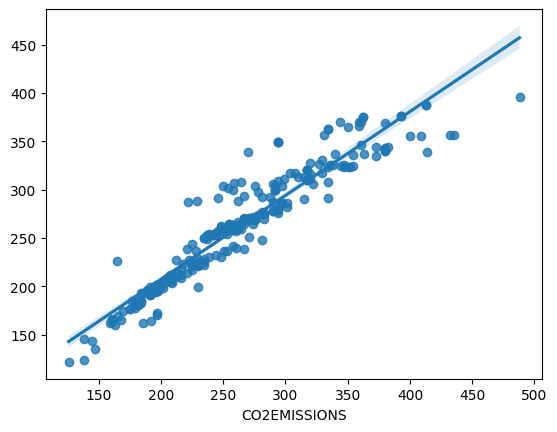

In [73]:
sns.regplot(x=y_test, y=predictions)

# **Training and Testing Accuracy**

In [74]:
print('Train set Accuracy:',r2_score(y_train,linear_reg.predict(x_train)))
print('Test set Accuracy:',r2_score(y_test,predictions))

Train set Accuracy: 0.8859605035435051
Test set Accuracy: 0.8958510284350495


In [75]:
df22 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df22

,Actual,Predicted
331,259,306.347317
467,290,278.281316
938,147,134.767399
60,281,291.981376
71,380,368.728601
...,...,...
628,202,203.834779
441,380,341.452283
872,253,261.203293
623,253,236.425345


# **Actual vs Predicted plot**

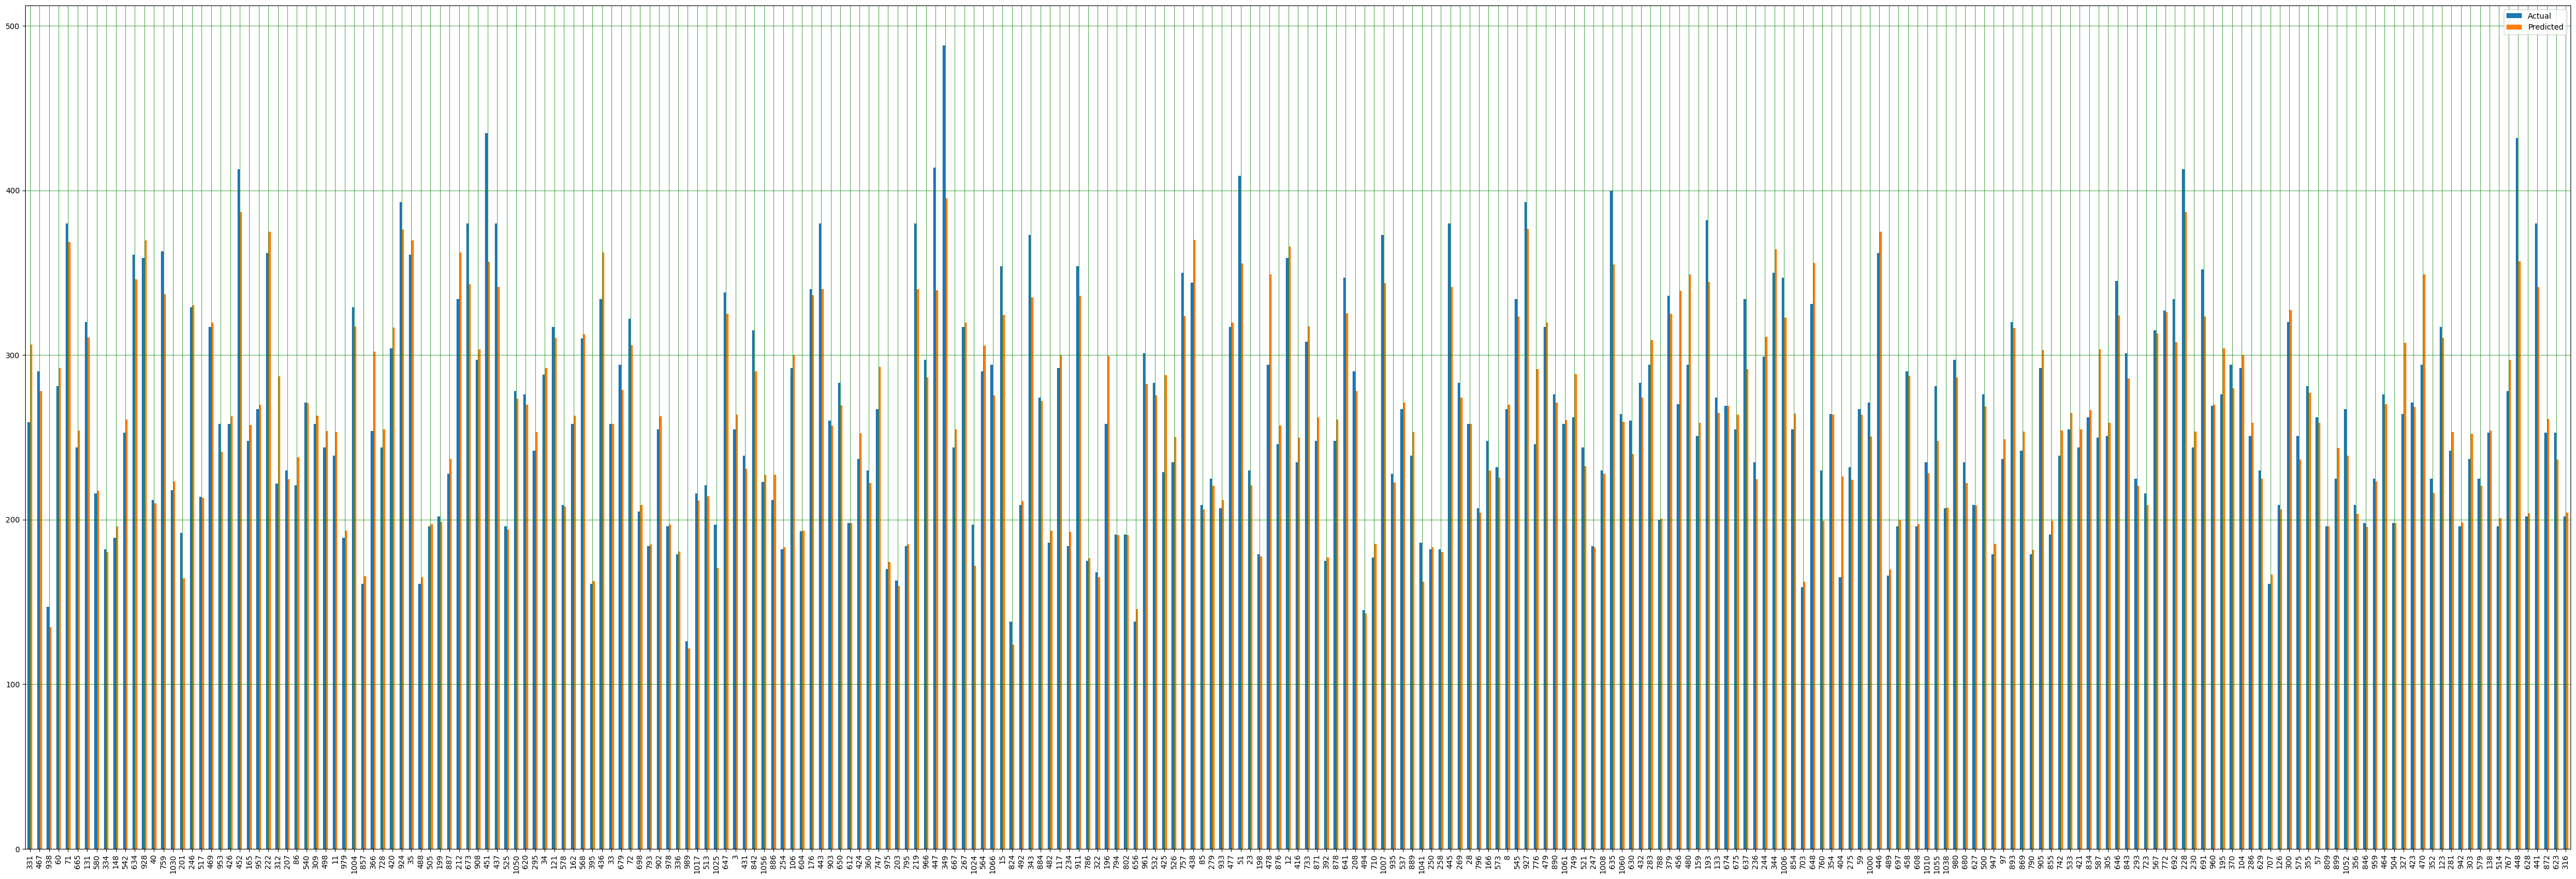

In [76]:
df22.plot(kind='bar',figsize=(60,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Again, According to OLS method**

**Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression). Least squares stand for the minimum squares error (SSE). Maximum likelihood and Generalized method of moments estimator are alternative approaches to OLS.**

In [77]:
statMDL=smf.ols('CO2EMISSIONS~ENGINESIZE+CYLINDERS+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG', data= df).fit()
print(statMDL.summary())
     

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:29:43   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# **Separating X and Y based on Ordinary Least Squqred Regression Result**

In [78]:
x=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
y=df['CO2EMISSIONS']

In [79]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']].corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,-0.770430,0.849685
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,-0.906394,1.000000


<Axes: >

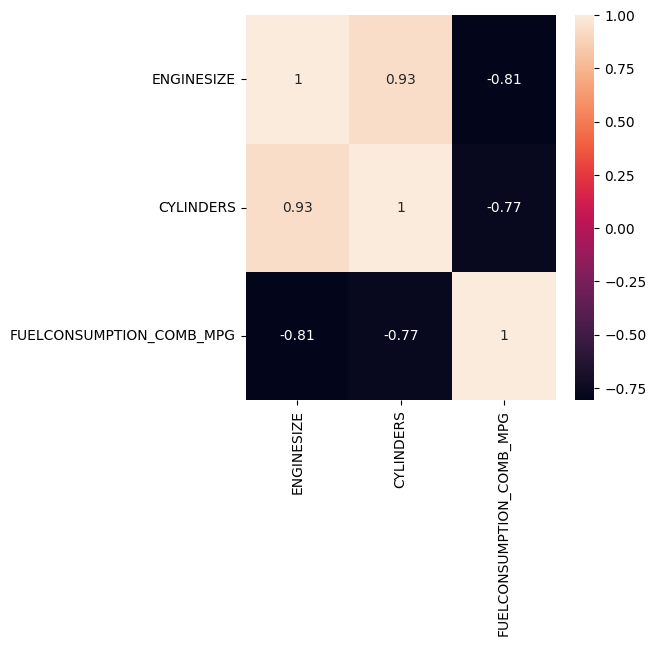

In [82]:
plt.figure(figsize=(5,5))

sns.heatmap(x.corr(), annot=True)

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [84]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [85]:
predictions=linear_reg.predict(x_test)
predictions

array([304.75922698, 281.10626619, 129.1126116 , 293.50712109,
       369.48764207, 256.34213257, 312.14358887, 217.24069926,
       177.74541805, 198.31833062, 261.07272473, 343.18091155,
       371.42408686, 208.0654158 , 333.82767427, 224.69524996,
       165.49008637, 332.14469973, 212.79600796, 322.1441443 ,
       242.00483288, 265.80331689, 372.49768351, 262.18389756,
       271.64508187, 359.98888157, 290.56745051, 226.70188357,
       241.32508413, 272.7562547 , 266.91448971, 256.34213257,
       256.34213257, 191.65129367, 314.36593452, 163.26774072,
       298.917462  , 256.34213257, 322.96941627, 377.26585185,
       368.09056838, 163.26774072, 198.60423148, 201.11247799,
       237.99156565, 350.52769725, 340.78061208, 307.12709585,
       353.57531487, 336.33592077, 194.15954018, 276.37567403,
       270.53390905, 257.4533054 , 293.50712109, 312.14358887,
       208.0654158 , 266.91448971, 314.08003366, 161.04539507,
       350.52769725, 260.24745276, 279.99509336, 307.69

In [86]:
print("Intercept:", linear_reg.intercept_)
coeff_df = pd.DataFrame(linear_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df
     

Intercept: 307.1168046918609


,Coefficient
ENGINESIZE,11.111728
CYLINDERS,6.343378
FUELCONSUMPTION_COMB_MPG,-4.730592


In [87]:
p_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
p_df

,Actual,Predicted
331,259,304.759227
467,290,281.106266
938,147,129.112612
60,281,293.507121
71,380,369.487642
...,...,...
628,202,203.334824
441,380,336.335921
872,253,264.406243
623,253,236.163068


In [88]:
print('Coefficients:', linear_reg.coef_)
print('Intercept:', linear_reg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))


Coefficients: [11.11172826  6.34337788 -4.73059216]
Intercept: 307.1168046918609
MAE: 14.528021284008478


In [89]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linear_reg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))
     

MSE: 487.3839241006477
RMSE: 22.0767734078295
AccuracyII: 88.53480655959554 %
R2: 0.8853480655959554


# **Regression Plot**

<Axes: xlabel='CO2EMISSIONS'>

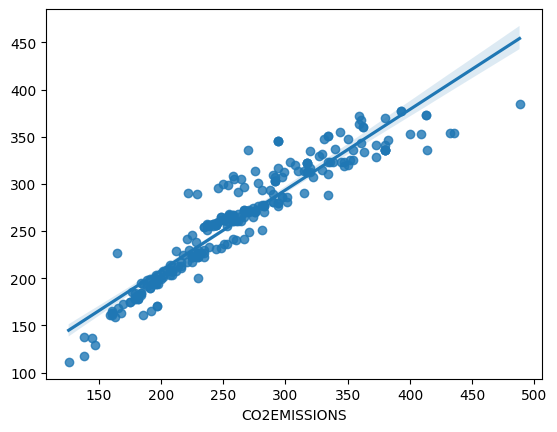

In [90]:
sns.regplot(x=y_test, y=predictions)

# **Training and Testing Accuracy**

In [91]:
print('Train set Accuracy:',r2_score(y_train,linear_reg.predict(x_train)))
print('Test set Accuracy:',r2_score(y_test,predictions))

Train set Accuracy: 0.8827636444239391
Test set Accuracy: 0.8853480655959554


In [92]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

df2

,Actual,Predicted
331,259,304.759227
467,290,281.106266
938,147,129.112612
60,281,293.507121
71,380,369.487642
...,...,...
628,202,203.334824
441,380,336.335921
872,253,264.406243
623,253,236.163068


# **Actual vs Predicted plot**

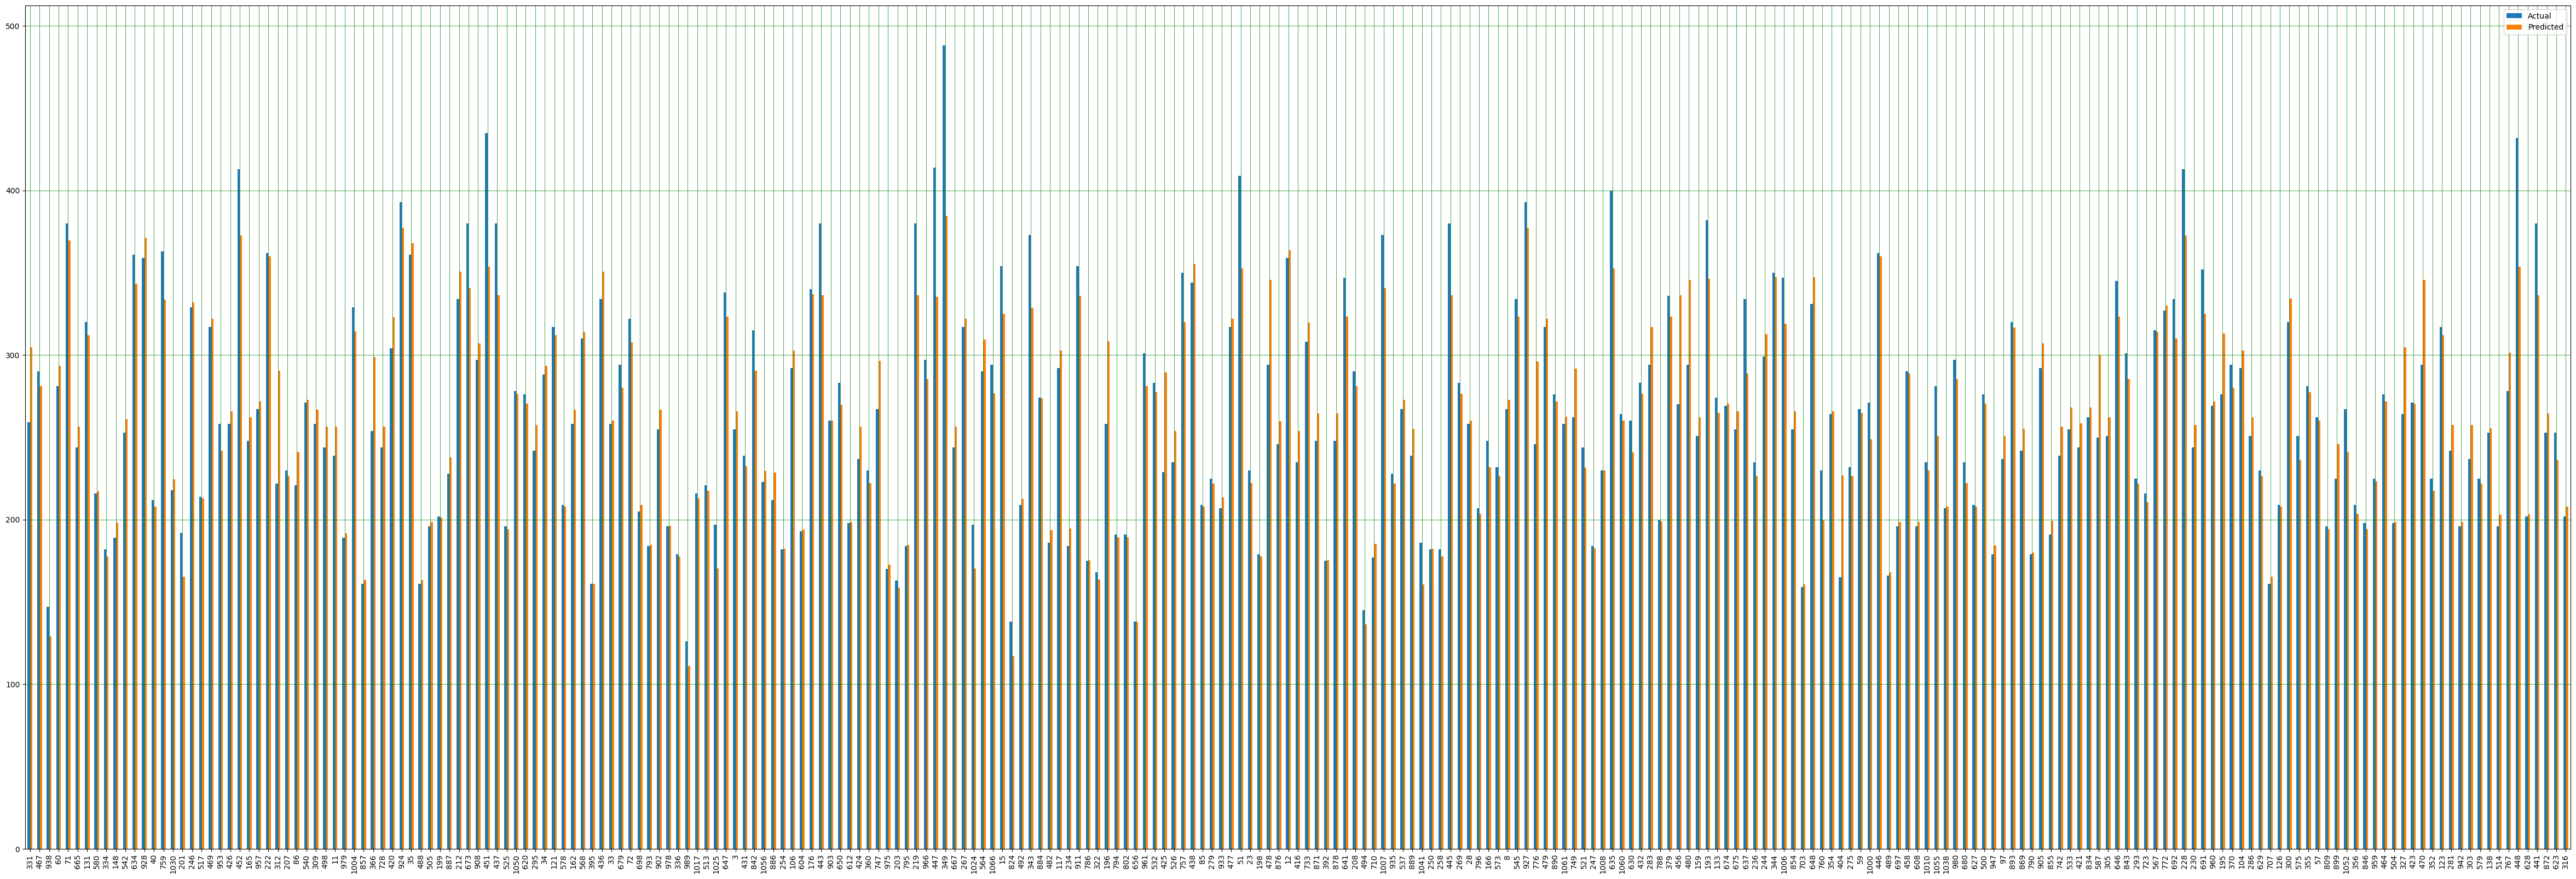

In [93]:
df2.plot(kind='bar',figsize=(60,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()